In [4]:
#Importing libraries                                                                                                                                import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime
import scipy
import math
import matplotlib
import matplotlib.image as mpimg
from scipy import interpolate
import matplotlib.dates as mdates
from matplotlib import ticker
from scipy.stats import *
import locale
import time
locale.getlocale()
# locale.setlocale(locale.LC_TIME,'en_US.)
locale.setlocale(locale.LC_TIME,'en_US.utf8')
locale.setlocale(locale.LC_ALL, 'en_US.utf8')
print(time.strftime("%d-%b-%Y"))

16-Jul-2022


In [5]:
#functions
def Language(g):
    global tunits,labeltM1,labelTS1,tlabel,Name
    if g=='RU':
        tunits='Относительная влажность %'
        labeltM1='WRF'
        labelTS1='наблюдение'  
        tlabel='Время суток'
        Name='NameRU'
        locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')
    elif g=='EN':
        tunits='Relative humidity %' 
        labeltM1='WRF Data sfc'
        labelTS1='Observation'     
        tlabel='Hour'
        Name='Name'
        locale.setlocale(locale.LC_TIME,'en_US.utf8')
def GeneratingListOfVariables(file_nc):
    nc = netCDF4.Dataset(file_nc,'r+')
    #print(nc.variables.items())
    times = nc.variables['time']
    #print(times)
    jd = netCDF4.num2date(times[:],times.units)
    nc.close
    variables=list(nc.variables.keys())[3::]
    return nc.variables,variables
def Graphercore(i,Variable,vari):
            lat=np.array(Variable['lat'])
            lon=np.array(Variable['lon'])
            Coord2= np.argmin(np.abs(lon - LOND[i]))
            Coord1= np.argmin(np.abs(lat - LATD[i]))
            print(lat[Coord1],lon[Coord2],'Lee coordinates')
            Var=np.array(Variable[vari])
            Var=Variable[vari][:,Coord1,Coord2]
            if vari in ['tmpprs','tmpsfc','tm']:
                Var=Var-273.15
                units='Temperature (°C)'
            #date=Variable['time'].units.replace('minutes since ','')
            jd=pd.date_range(date,periods=len(Variable['time']),freq='H',name='Date')
            hs = pd.Series(Var,name=vari,index=jd) 
            return hs

# Before Beginning

1. Choose the language

In [6]:
LANG='EN'
Language(LANG)



In [7]:
date='2016-05-09 19:00';Date1='2016-05-10';Date2='2016-05-12';Date='20160501';Date3='2016-05-12 22:00'
date='2016-06-26 19:00';Date1='2016-06-27';Date2='2016-06-29';Date='20160627';Date3='2016-06-29 22:00'
date='2017-07-27 19:00';Date1='2017-07-28';Date2='2017-07-30';Date='20170728';Date3='2017-07-30 22:00'
date='2018-07-12 19:00';Date1='2018-07-13';Date2='2018-07-15';Date='20180713';Date3='2018-07-15 22:00'
date='2018-08-24 19:00';Date1='2018-08-25';Date2='2018-08-27';Date='20180825';Date3='2018-08-27 22:00'
date='2019-08-25 19:00';Date1='2019-08-26';Date2='2019-08-28';Date='20190826';Date3='2019-08-28 21:00'
#date='2020-02-10 19:00';Date1='2020-02-11';Date2='2020-02-13';Date='20200210';Date3='2020-02-13 21:00'
#Stations=[21255170,21206990,21185090,21255160,26135300,26155230,21206930,44035040,21115180]
path3='/home/usuario/Desktop/imagesTobeerased/'
ymin=0
ymax=100
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

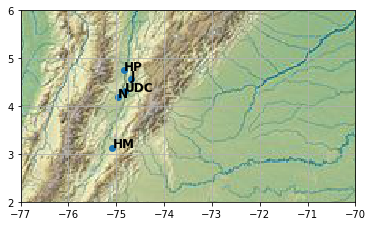

In [11]:
LATD=[]
LOND=[]
ALTD=[]
NAME=[]
Stations=[21115170,21115180,21195190,21185090]
# Stations=[21235030,21255160,21185090,21115180,21235010]
# Stations=[22045010,21195170,2615500122,2614500112,2305500055,21115010,46015030,21235010]
# Stations=[21235030,26105250,22075050,23035030]#Pressure Stations
# Stations=[21235030,21255160,21185090,21115180,21206920,21195170]#T,RH and V used in the algorithm
Stations=[21235030,21255160,21185090,21115180,21206920,21206930]
Stations=[21235030,21255160,21185090,21115180,21235010]
for i in range(len(Stations)):
    i
    COD=Stations[i]
    St=pd.read_csv('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/DATA/DataProcessing/Stations.csv')#Opening file with coordinates of Stations
    NAME.append(str.title(St[St['Station']==COD]['Name'].values[0]))
    LATD.append(round(St.latitud[St['Station']==COD].values[0],2))
    LOND.append(round(-St[St['Station']==COD]['longitud'].values[0],2))
    ALTD.append(St[St['Station']==COD]['altitud'].values[0])
ST=pd.DataFrame({'Name':NAME,'Longitude':LOND,'Latitude':LATD,'Altitude':ALTD},index=Stations)
# F = [chr(ord('a') + x).upper() for x in ST.index]
ST.to_csv('StationsERAValidation.csv')
fig,ax=plt.subplots()
ax.imshow(mpimg.imread('/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/WRFValidation/Colombia_relief_location_map.jpg'),extent=(-85.12,-66.44,-4.6,16.6))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylim([2,6])
plt.xlim([-77,-70])
plt.grid()
# LONN=[str(-x)+' W' for x in LOND]
for i, txt in enumerate(NAME):
    f=''.join(c for c in str(txt) if c.isupper())
    ax.annotate(f, (LOND[i], LATD[i]),color='black',weight='bold',fontsize=12)
ax.scatter(LOND,LATD,label='Data Stations')
# ax.scatter(LOND[0],LATD[0],label='Data Stations')#Just for onem station
# ax.scatter(LON,LAT,label='ERA 5')
# ax=fig.gca()
# # plt.legend()
# ax.set_xticklabels(LONN)
# ax.set_yticklabels(LATT)
plt.show()


In [9]:
LONN=[i.get_text()[1::]+'W' for i in ax.get_xticklabels()]
LATT=[i.get_text()[0::]+'N' for i in ax.get_yticklabels()]

# ax.s
type(LONN[0])
LATT
ST

,Name,Longitude,Latitude,Altitude
21235030,Universidad De Cundinamarca,-74.81,4.31,309
21255160,Hacienda Pajonales,-74.83,4.76,277
21185090,Nataima,-74.96,4.19,393
21115180,Hacienda Manila,-75.08,3.13,600
21206920,Villa Teresa,-74.15,4.35,3624
21206930,Paramo Guerrero,-74.02,5.09,3257


In [24]:
def Plotting2(i):
    Language(LANG)
    Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
    Variable='HRA2_AUT_60@'
    StationT=str(Stations[i])
    TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
    path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
    file1 = '/RH2M.nc' 
    fn1=path+Date+file1
    Variables,variables=GeneratingListOfVariables(fn1)
    vari='rh2m'
    Variables
    TM1=Graphercore(i,Variables,vari) 
    fig, ax = plt.subplots()
    ax.set_ylim([ymin, ymax])
    TM1.plot(ylabel=tunits,ax=ax,label='WRF Data sfc')
    TS[Date1:Date2].plot(ax=ax,xlim=[Date1,Date3])
    ax.set_xlabel(tlabel)
    ax.legend(loc='best',bbox_to_anchor=(1., 1.12))
    ax.get_legend().remove()
    string=Date+'RH2M'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    TM1.corr(TS[Date1:Date2]['Station Data'])
    ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date2]['Station Data']),2)
    print(ST.loc[Stations[i]])
    x=TM1[Date1:Date3];
    y=TS[Date1:Date3]
    hh=x[x.index.isin(y.index)==True]
    SgM=round(y.std(),2)[0]
    SgD=round(hh.std(),2)
    ST.loc[int(StationT),[r'$\sigma_{d}$']]=SgD
    ST.loc[int(StationT),[r'$\sigma_{m}$']]=SgM
    fig2, ax2 = plt.subplots()
    ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
    ax2.set_xlim([0,100])
    ax2.set_ylim([0,100])
    ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
    plt.legend()
    string=Date+'RH2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
    plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
    plt.show()
    rho=TM1.corr(TS[Date1:Date2]['Station Data'])
    n=len(TS[Date1:Date3])-2
    tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
    pval = t.sf(np.abs(tSt), n)*2
    ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]


4.19 -74.96581939799331 Lee coordinates


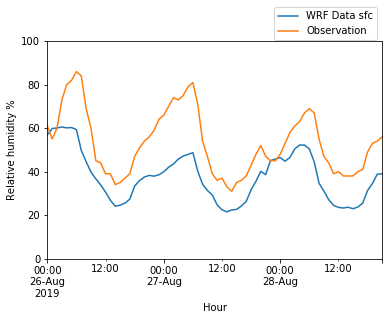

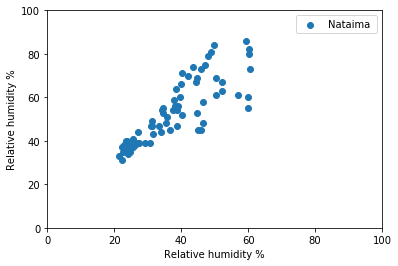

(                      Name  Longitude  Latitude  Altitude  $\rho$  \
 21115170         La Plata      -75.07      2.76      2101    0.25   
 21115180  Hacienda Manila      -75.08      3.13       600    0.40   
 21195190            Pasca      -74.31      4.31      2256     NaN   
 21185090          Nataima      -74.96      4.19       393    0.84   
 
           $\sigma_{d}$  $\sigma_{m}$ $p_{val}$  
 21115170          7.41         10.85  0.044141  
 21115180          7.82         12.52  0.009076  
 21195190           NaN           NaN       NaN  
 21185090         11.49         14.76  2.79e-19  ,
 14.76)

In [71]:
#Charging files
Language(LANG)
Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
Variable='HRA2_AUT_60@'
i=3
StationT=str(Stations[i])
TS=pd.read_csv(Path+Variable+StationT+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Station Data'],index_col='time')
path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/Tesis/WRF/'
file1 = '/RH2M.nc' 
fn1=path+Date+file1
Variables,variables=GeneratingListOfVariables(fn1)
vari='rh2m'
TM1=Graphercore(i,Variables,vari)  
fig, ax = plt.subplots()
ax.set_ylim([ymin, ymax])
TM1.plot(ylabel=tunits,ax=ax,label=labeltM1)
TS[Date1:Date2].plot(ax=ax,label=labelTS1,xlim=[Date1,Date3])
ax.legend([labeltM1,labelTS1],loc='best',bbox_to_anchor=(1., 1.18))
ax.set_xlabel(tlabel)
ST.loc[int(StationT),[r'$\rho$']]=round(TM1.corr(TS[Date1:Date3]['Station Data']),2)
string=Date+'RH2M'+ST.loc[Stations[i]]['Name']+'.png'
plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
rho=TM1.corr(TS[Date1:Date2]['Station Data'])
n=len(TS[Date1:Date3])-2
tSt=rho*math.sqrt(n-2)/math.sqrt(1-rho**2)
pval = t.sf(np.abs(tSt), n)*2
ST.loc[int(StationT),[r'$p_{val}$']]=str(pval)[0:4]+str(pval)[-4::]
x=TM1[Date1:Date3];y=TS[Date1:Date3]
hh=x[x.index.isin(y.index)==True]
SgM=round(y.std(),2)[0]
SgD=round(hh.std(),2)
ST.loc[int(StationT),[r'$\sigma_{d}$']]=SgD
ST.loc[int(StationT),[r'$\sigma_{m}$']]=SgM
fig2, ax2 = plt.subplots()
ax2.set_xlabel(tunits);ax2.set_ylabel(tunits)
ax2.scatter(hh,y,label=ST.loc[Stations[i]][Name])
ax2.set_xlim([0,100])
ax2.set_ylim([0,100])
plt.legend()
string=Date+'RH2M'+'Scatter'+ST.loc[Stations[i]]['Name']+'.png'
plt.savefig(path3+string.replace(" ", ""), bbox_inches = "tight")
plt.show()
Variables
ST,SgM



In [69]:
# x=TM1[Date1:Date3]
# y=TS[Date1:Date3]
# len(x),len(y)
# # x.head(3),x.tail(3)   
# # string=Date+'RH2M'+ST.loc[Stations[i]]['Name']+'.png'
# ST.loc[Stations[i]]['Name']
# len(hh),len(y)
TS[Date1:Date2]


,Station Data
time,


In [42]:
TM1

Date
2019-08-25 19:00:00    89.432503
2019-08-25 20:00:00    65.823845
2019-08-25 21:00:00    71.807617
2019-08-25 22:00:00    68.259079
2019-08-25 23:00:00    71.029114
                         ...    
2019-08-28 17:00:00    76.121597
2019-08-28 18:00:00    81.840050
2019-08-28 19:00:00    77.625885
2019-08-28 20:00:00    79.154938
2019-08-28 21:00:00    77.270798
Freq: H, Name: rh2m, Length: 75, dtype: float32

In [ ]:
len(Variables['time'][:]),Variables['time']
y.head(3),y.tail(3)

In [ ]:
Plotting2(2)

In [ ]:
#Charging files
# i=1
# Plotting2(1)

In [208]:
21255170

21255170

3.1088 -75.1012508361204 Lee coordinates
Name            Hacienda Manila 
Longitude                 -75.08
Latitude                    3.13
Altitude                     600
$\rho$                       0.4
$\sigma_{d}$                7.82
$\sigma_{m}$               12.52
$p_{val}$               0.009076
Name: 21115180, dtype: object


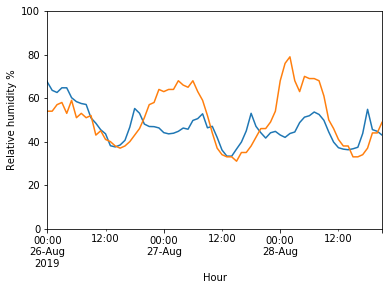

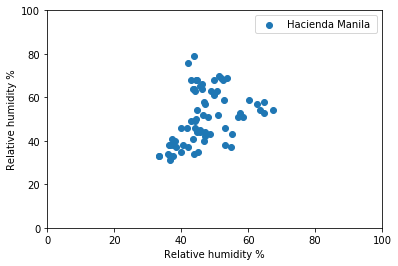

In [33]:
#Charging files
i=1
Plotting2(i)

4.19 -74.96581939799331 Lee coordinates
Name         Nataima 
Longitude      -74.96
Latitude         4.19
Altitude          393
$\rho$           0.84
Name: 21185090, dtype: object


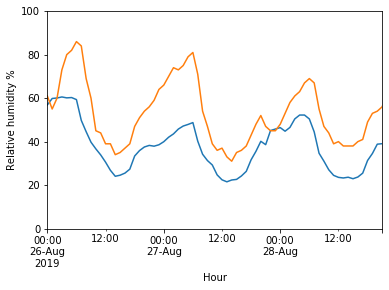

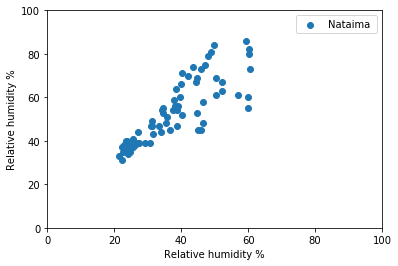

In [28]:
i=3
Plotting2(i)

4.19 -74.96581939799331 Lee coordinates
Name            Nataima 
Longitude         -74.96
Latitude            4.19
Altitude             393
$\rho$              0.84
$\sigma_{d}$       11.49
$\sigma_{m}$       14.76
$p_{val}$       2.79e-19
Name: 21185090, dtype: object


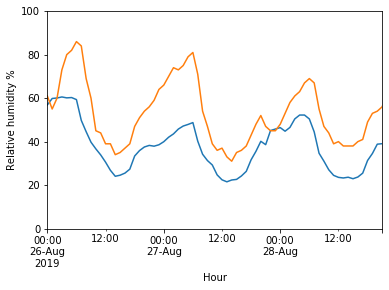

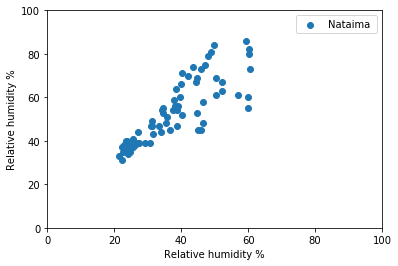

In [72]:
i=3
Plotting2(i)

In [30]:
ST

,Name,Longitude,Latitude,Altitude,$\rho$,$\sigma_{d}$,$\sigma_{m}$,$p_{val}$
21115170,La Plata,-75.07,2.76,2101,NaN,NaN,NaN,NaN
21115180,Hacienda Manila,-75.08,3.13,600,0.40,7.82,12.52,0.009076
21195190,Pasca,-74.31,4.31,2256,NaN,NaN,NaN,NaN
21185090,Nataima,-74.96,4.19,393,0.84,11.49,14.76,2.79e-19
